# LOG

- GitHub repository: https://github.com/heitonn/heitonn-ind320-streamlit
- Streamlit app (deployed): https://heitonn-ind320-app-jxcqyxefi4nb9vsppba5ca.streamlit.app/


**Jupyter notebook**

Started with importing pandas, numpy and matplotlib. I have briefly worked with pandas before.
Read the supplied CSV file and used .info(), .head() and .describe() to get an overview of the dataset.
Renamed the column names to more readable names and set time as the index for easier plotting.
Plotted the raw data as a function of time. Further, I made a new data frame with average daily values for all columns and plotted them in separate plots. The average plots are less noisy but contain less information than the hourly data plots. Still, in a non-interactive plot, the hourly data plots are hard to read, so the information loss might be acceptable given that it is impossible in a non-interactive plot to find exact values.

The line plot of wind direction is not very fruitful. To work around the challenges of presenting the wind direction in a useful way, I made a function to divide the wind direction into categorical data. I then created a bar plot which showed that wind from west and south is the dominating wind direction. From the daily vs hourly bar plots, one can see that more information is lost when aggregating.

Then I plotted all the columns in one graph. The direct line plot of all variables with the hourly data is quite noisy and hard to read.
The daily average plot is still hard to read because wind direction with values from 0–360 makes the axis large and the plot of the other variables quite flat.
I tried plotting the wind direction using color-coded categorical data, which made the plot slightly more readable.

***AI usage for jupyter notebook part of the project***

I have widely used ChatGPT, especially for details in plotting which is very time-saving.
Most of the pre-processing I have done myself, but I have occasionally asked ChatGPT for help and advice when it didn’t turn out the way I wanted.

**Streamlit app  (including AI usage)**
I have no prior experience with Streamlit, and honestly, I find it a bit cumbersome. I struggled quite a lot with the first lecture examples with the Collatz app.
I started by setting up the front page and four subpages through a mix of online resources and a fair amount of trial and error.
Most of the weather data plotting has been done in close collaboration with ChatGPT.
The pure Pandas operations, such as reading the data and filtering out what was needed for each task, I managed (mostly) on my own. However, the Streamlit-specific parts, like selectbox, select_slider, and LineChartColumn(), were done with a great amount of ChatGPT’s help.


# Start Jupyter Notebook project
 - Importing necessary libraries
 - Opening and reading the CSV file

## Overview of the data

- df.head() – returns the first five rows of the dataset, including column names
- df.info() – shows missing values, data types, and total number of entries
- df.describe() – shows summary statistics for each column

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r'..\my_streamlit_app\open-meteo-subset.csv')

In [4]:
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [6]:
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


## Preparing for plotting
- converting time column from data type object to datetime
- setting time as index
- renaming column to more readable names 


In [7]:
# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

In [8]:
# Set datetime as index
df.set_index('time', inplace=True)

In [9]:
#Renaming columnnames
df = df.rename(columns={"temperature_2m (°C)" : "Temperature 2m (°C)", 
                        "precipitation (mm)" : "Precipitation (mm)",
                        "wind_speed_10m (m/s)" : "Wind speed 10m (m/s)",
                        "wind_gusts_10m (m/s)" : "Wind gusts 10m (m/s)", 
                        "wind_direction_10m (°)" : "Wind dir 10m (°)"})

## Plotting

### Hourly data

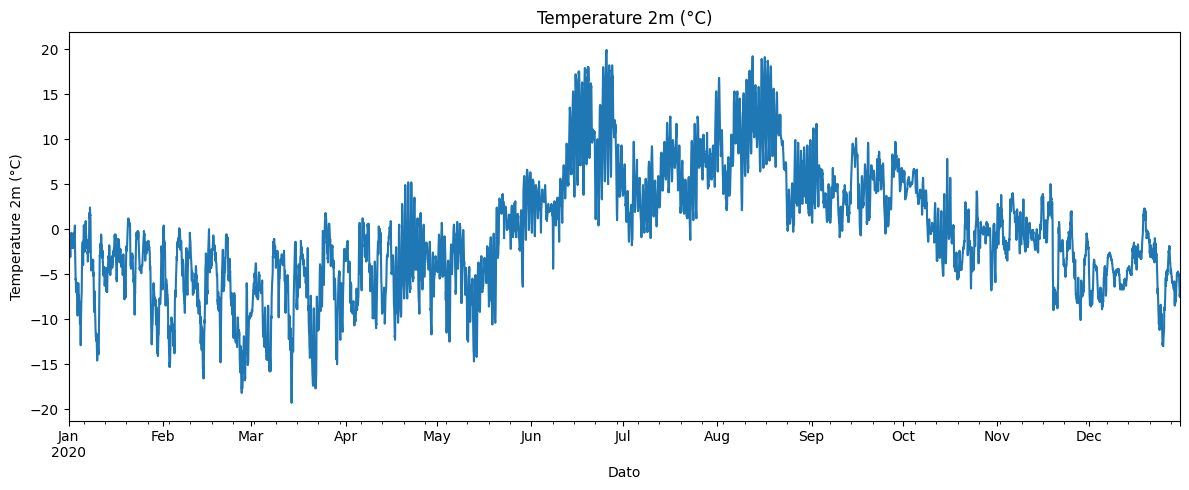

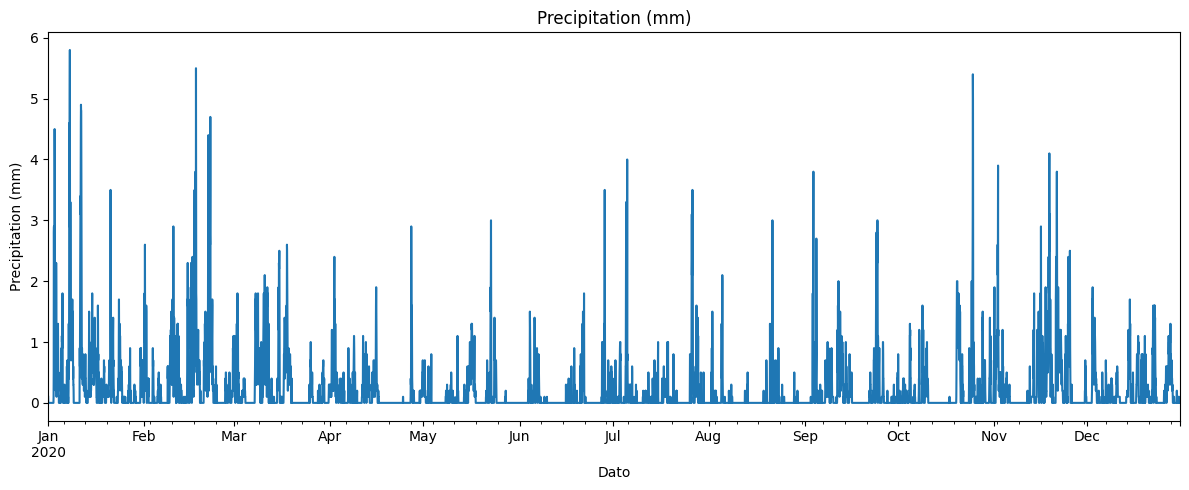

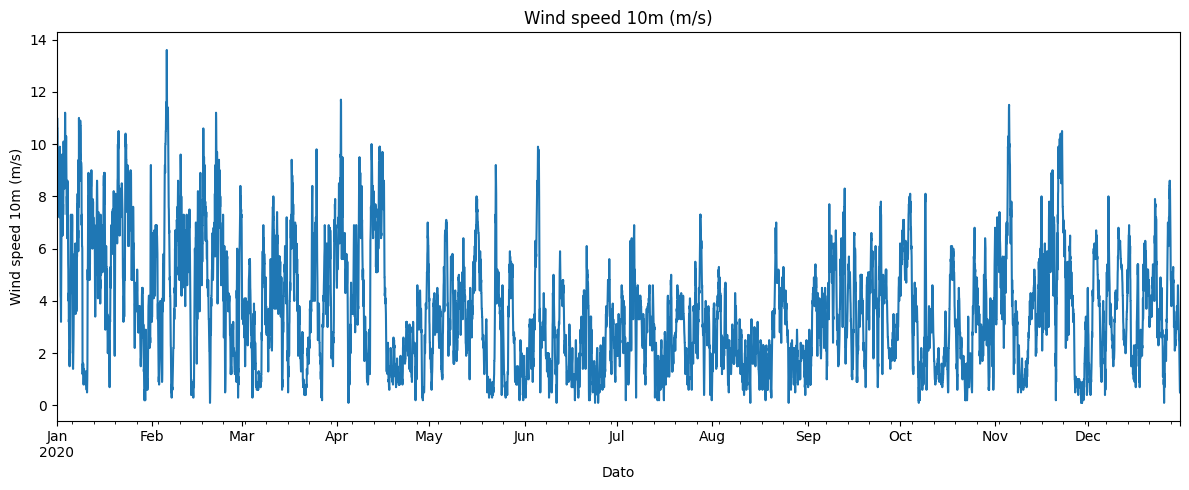

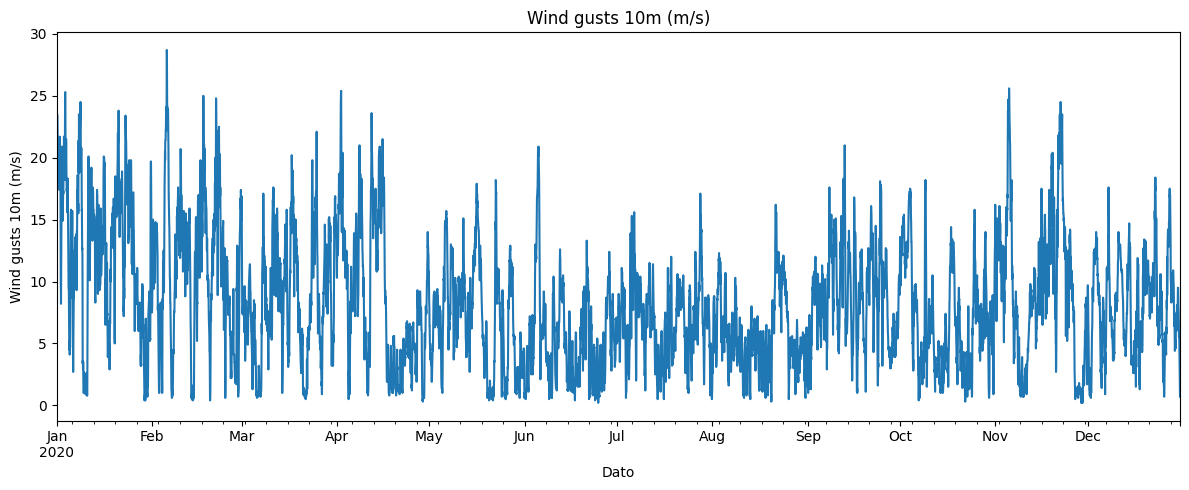

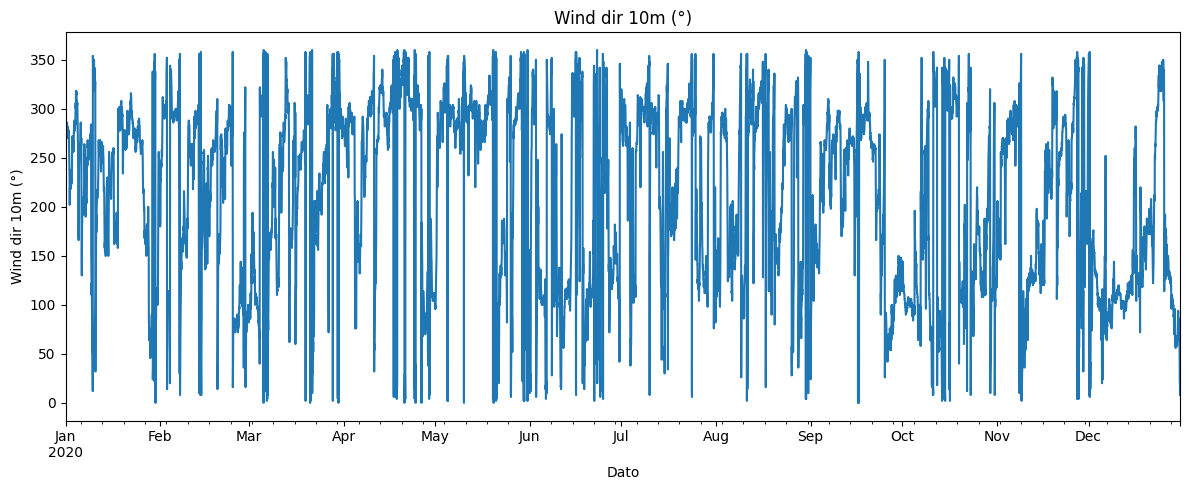

In [10]:
#plotting each column as a function of time 
for col in df.columns:
    plt.figure(figsize=(12, 5)) 
    df[col].plot(title=col)
    plt.xlabel('Dato')
    plt.ylabel(col)
    plt.tight_layout() 
    plt.show()

### Daily average data

In [11]:
# Creating a new dataframe, daily_avg containing the daily average of all columns 
daily_avg = df.resample('D').mean()

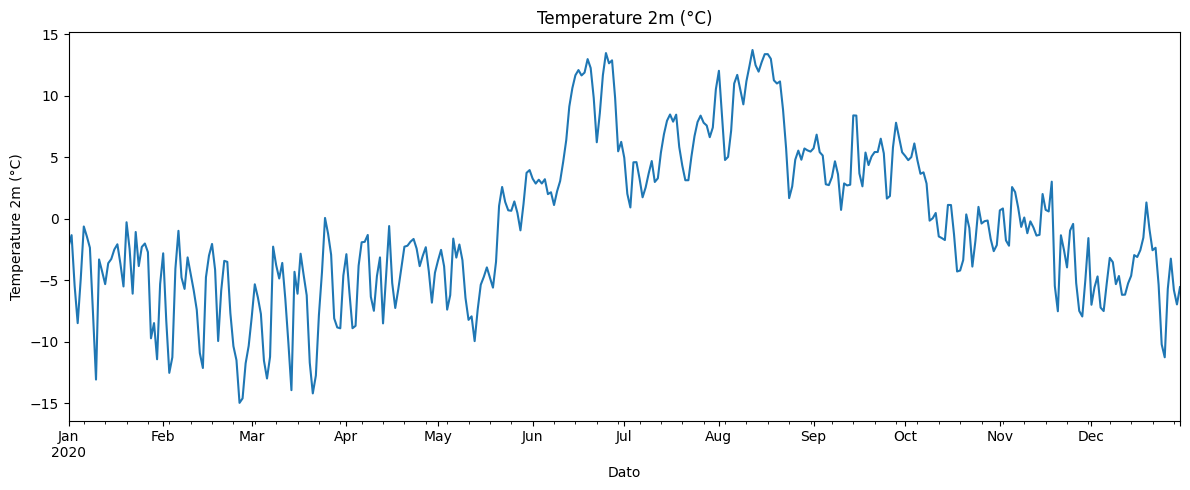

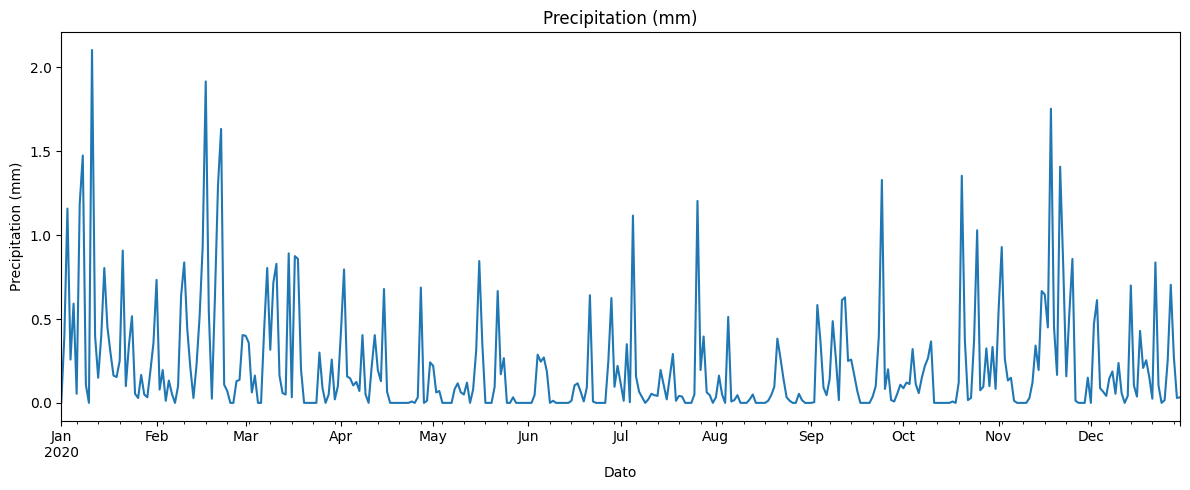

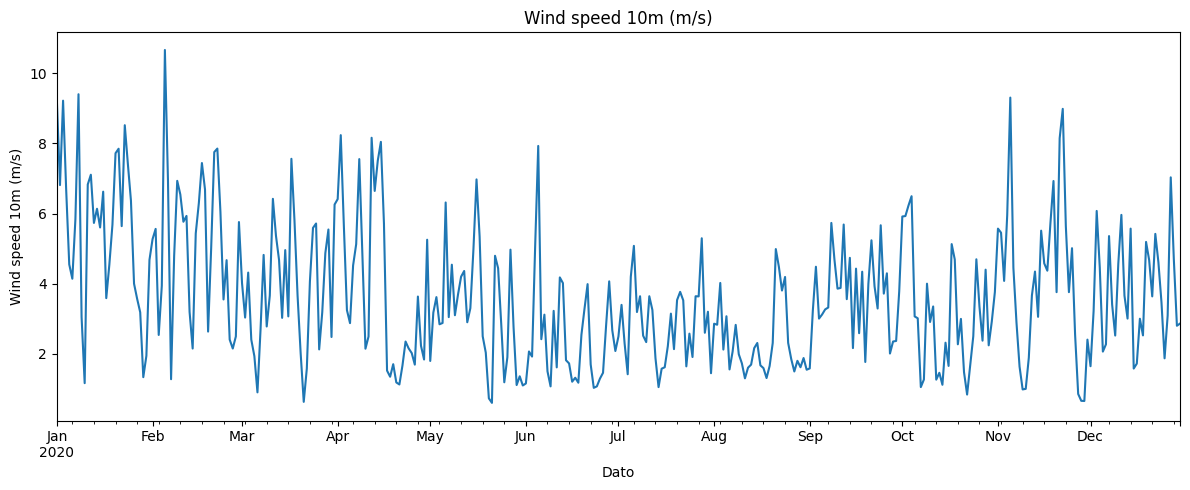

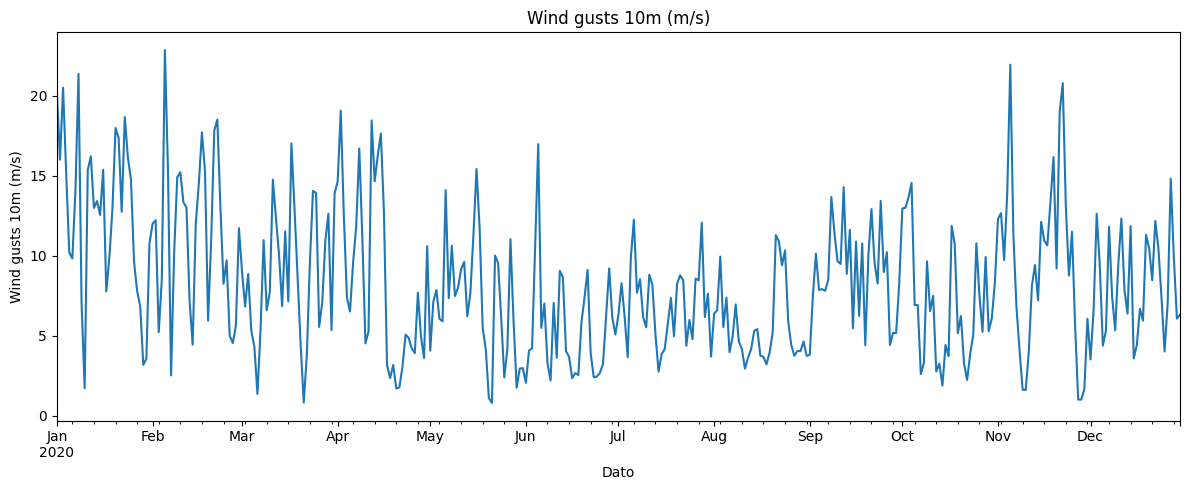

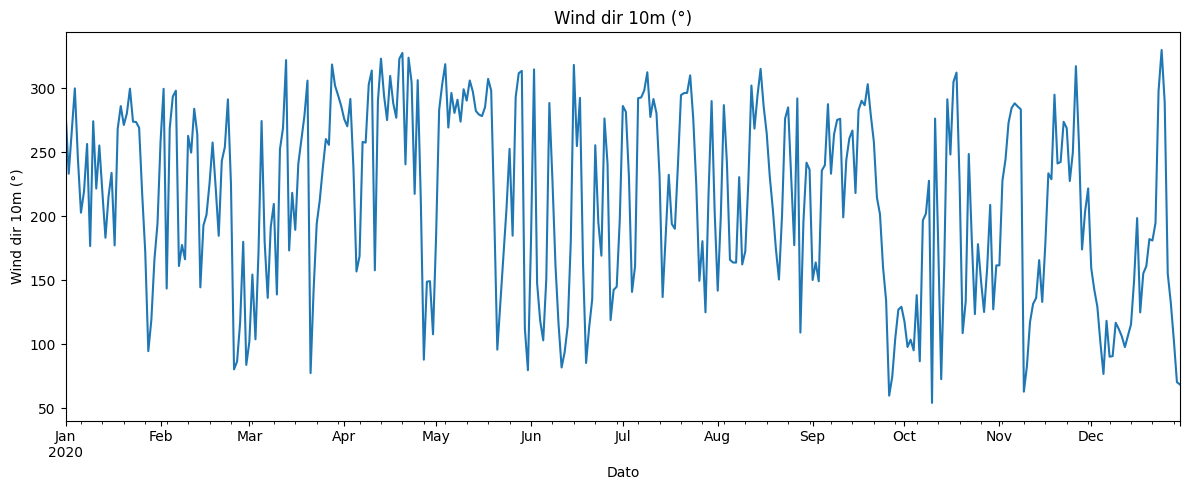

In [12]:
for col in daily_avg.columns:
    plt.figure(figsize=(12, 5)) 
    daily_avg[col].plot(title=col)
    plt.xlabel('Dato')
    plt.ylabel(col)
    plt.tight_layout() 
    plt.show()

### Handling wind direction
- Converting wind direction to categorical data 
- Grouping wind direction in eight sectors N, NV, V, SV, S, SE, E, NE

In [13]:


def wind_sector(deg):
    if (deg >= 337.5) or (deg < 22.5):
        return "N"
    elif deg < 67.5:
        return "NØ"
    elif deg < 112.5:
        return "Ø"
    elif deg < 157.5:
        return "SØ"
    elif deg < 202.5:
        return "S"
    elif deg < 247.5:
        return "SV"
    elif deg < 292.5:
        return "V"
    else:
        return "NV"



#### Bar plots of wind direction

<Axes: title={'center': 'Wind sector daily average '}, xlabel='Wind sector'>

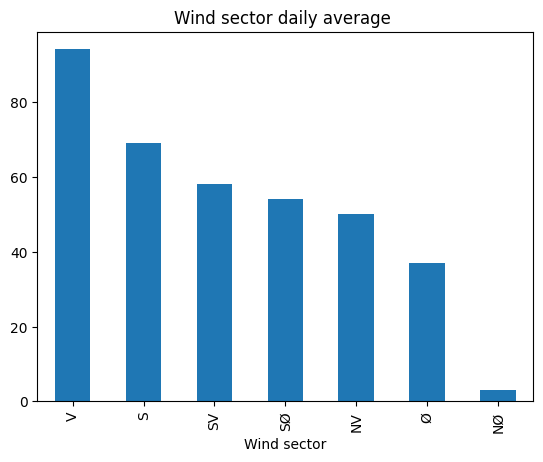

In [14]:
# adding a new column "Wind sector" to daily average df using function wind_sector 
daily_avg["Wind sector"] = daily_avg["Wind dir 10m (°)"].apply(wind_sector)

#creates a dataframe for plotting a bar-chart for average each day 
grouped_wind_sector = daily_avg["Wind sector"].value_counts()
grouped_wind_sector.plot(kind="bar", title = "Wind sector daily average ")

<Axes: title={'center': 'Wid sector hourly data'}, xlabel='Wind sector'>

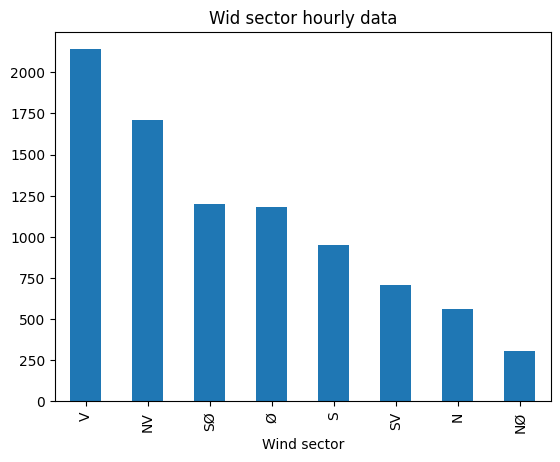

In [15]:
#creating a new column, wind sector, to the original dataset(hourly) using the function wind_sector 

df["Wind sector"] = df["Wind dir 10m (°)"].apply(wind_sector)
grouped_wind_sector = df["Wind sector"].value_counts()
grouped_wind_sector.plot(kind="bar", title="Wid sector hourly data")

### Plotting all columns in one graph

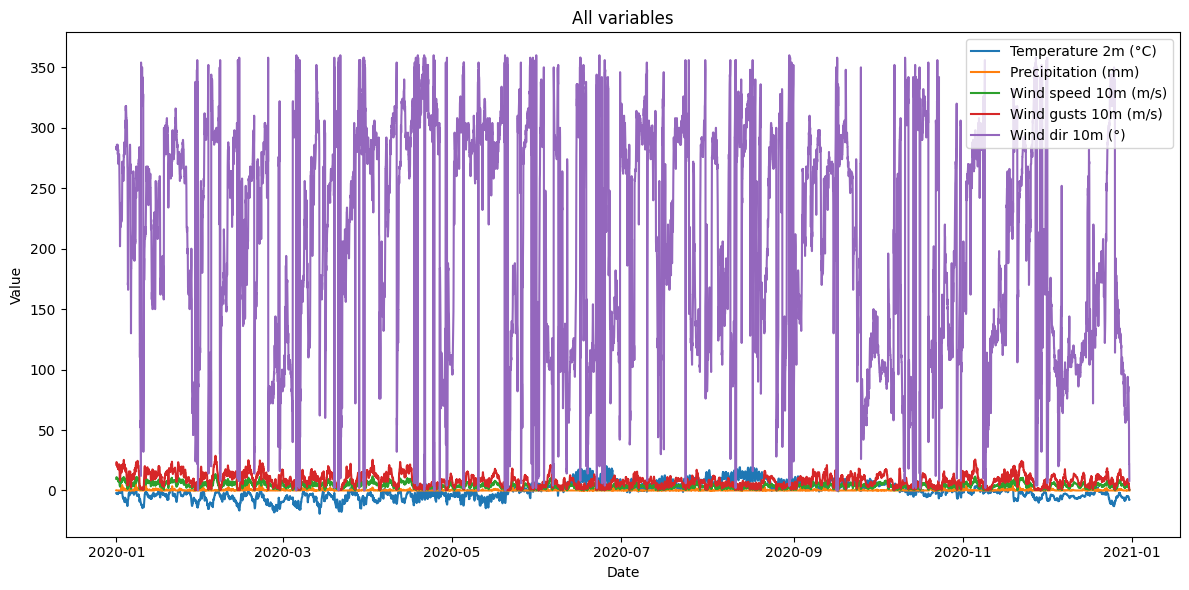

In [16]:
# Ploting all columns from df/hourly data 
plt.figure(figsize=(12, 6))
for col in df.columns.drop("Wind sector"):  #dropping the categorival (wind sector)
    plt.plot(df.index, df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("All variables")
plt.legend()
plt.tight_layout()
plt.show()

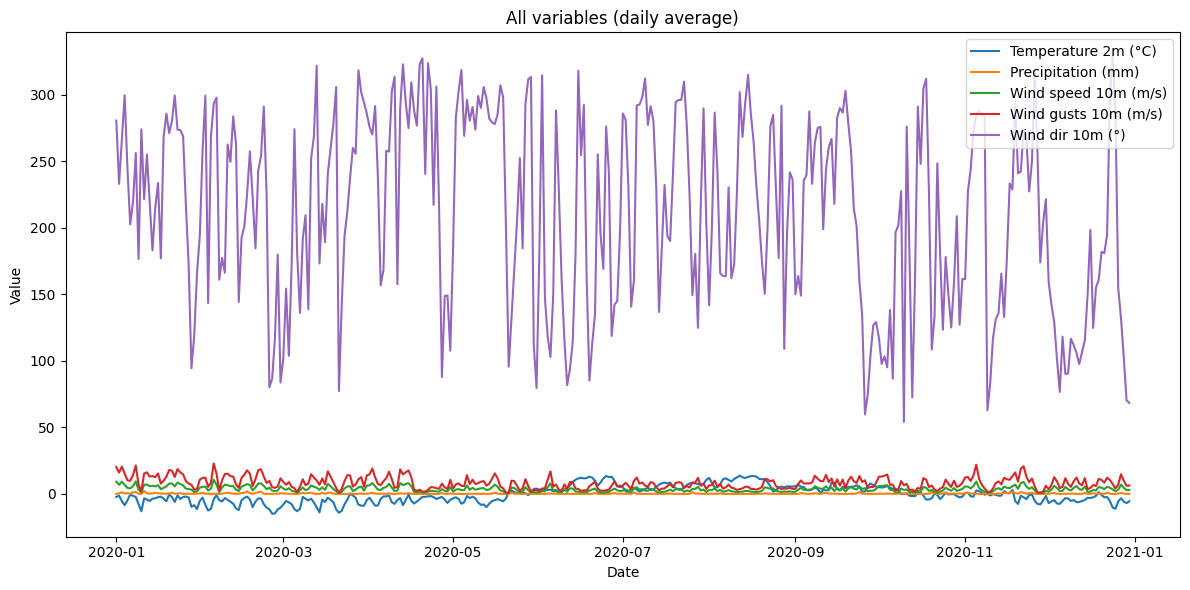

In [17]:
# Ploting all columns from daily average
plt.figure(figsize=(12, 6))
for col in daily_avg.columns.drop("Wind sector"):  #dropping the categorival (wind sector)
    plt.plot(daily_avg.index, daily_avg[col], label=col)

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("All variables (daily average)")
plt.legend()
plt.tight_layout()
plt.show()

### Plotting using wind direction as categorical data

NameError: name 'sns' is not defined

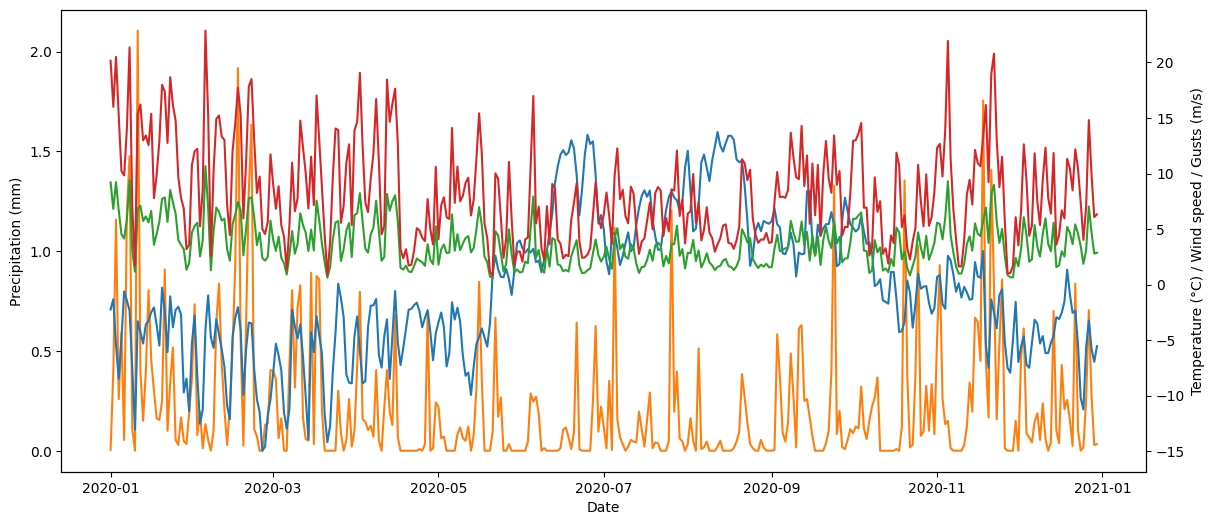

In [18]:
import matplotlib.patches as mpatches

fig, ax1 = plt.subplots(figsize=(14, 6))

# left y-axis precipitation 
ax1.plot(daily_avg.index, daily_avg["Precipitation (mm)"], color="tab:orange", label="Precipitation (mm)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Precipitation (mm)")
ax1.tick_params(axis="y")

# Right y-axis: temperature, wind speed, wind gusts 
ax2 = ax1.twinx()
ax2.plot(daily_avg.index, daily_avg["Temperature 2m (°C)"], color="tab:blue", label="Temperature 2m (°C)")
ax2.plot(daily_avg.index, daily_avg["Wind speed 10m (m/s)"], color="tab:green", label="Wind speed 10m (m/s)")
ax2.plot(daily_avg.index, daily_avg["Wind gusts 10m (m/s)"], color="tab:red", label="Wind gusts 10m (m/s)")
ax2.set_ylabel("Temperature (°C) / Wind speed / Gusts (m/s)")
ax2.tick_params(axis="y")

# Scatter overlay for wind sector place over line graphs vindsektor
scatter_y = 25 
sns.scatterplot(
    x=daily_avg.index,
    y=[scatter_y]*len(daily_avg),
    hue=daily_avg["Wind sector"],
    palette="tab10",
    s=70,
    alpha=0.9,
    ax=ax2,
    legend=False 
)

# Legend for line plots 
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax2.legend(handles=lines, loc="upper right", title="Variable")

# Creating legend for wind sector 
wind_sectors = sorted(daily_avg["Wind sector"].unique())
colors = sns.color_palette("tab10", n_colors=len(wind_sectors))
sector_patches = [mpatches.Patch(color=colors[i], label=wind_sectors[i]) for i in range(len(wind_sectors))]


# Placing legend for wind sector horizontally under scatter-line 
fig.legend(handles=sector_patches, loc="lower center", ncol=len(wind_sectors), title="Wind sector", frameon=True, bbox_to_anchor=(0.5, 0.78))

plt.title("Temperature, Precipitation, Wind speed and Gusts with Wind sector")
plt.tight_layout()
plt.show()
